# Randorm Forest

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load cleaned dataset
df_clean = pd.read_csv("./data/pred_maintenance_cleaned.csv")

# Split into features and target
X = df_clean.drop(columns=['Machine failure'])
y = df_clean['Machine failure']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Model Training

In [2]:
from sklearn.ensemble import RandomForestClassifier
import time

# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Measure training time
start_time = time.time()
rf_model.fit(X_train, y_train)
training_time = time.time() - start_time

print(f"Training time: {training_time:.4f} seconds")


Training time: 0.3058 seconds


## Predict and Evaluate

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      0.97      0.99        68

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



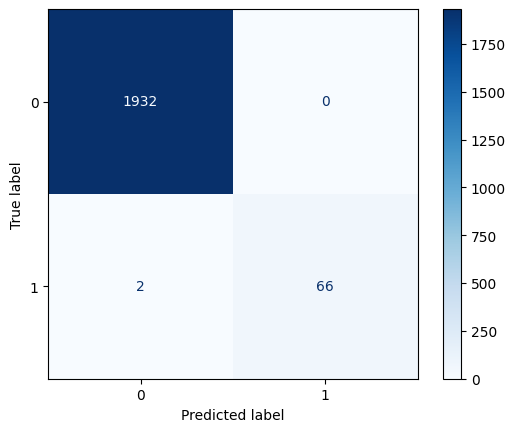

In [3]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation metrics
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print full report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_model.classes_)
disp.plot(cmap="Blues")


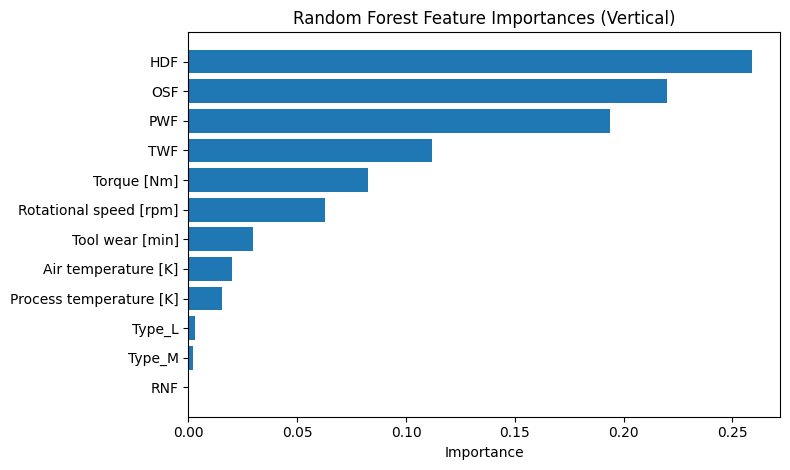

In [8]:
# Sort and format feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns
sorted_idx = np.argsort(importances)

# Plot vertically
plt.figure(figsize=(8, len(feature_names) * 0.4))
plt.barh(range(len(importances)), importances[sorted_idx], align="center")
plt.yticks(range(len(importances)), feature_names[sorted_idx])
plt.xlabel("Importance")
plt.title("Random Forest Feature Importances (Vertical)")
plt.tight_layout()
plt.show()



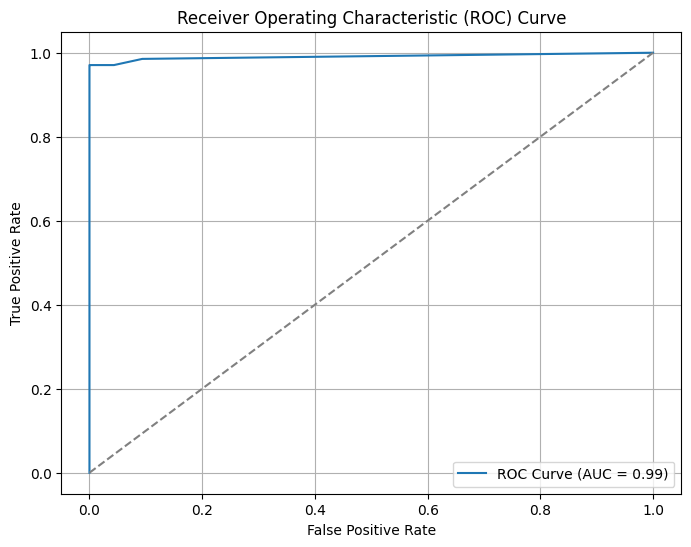

In [5]:
from sklearn.metrics import roc_auc_score, roc_curve

# Predict probabilities for positive class
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


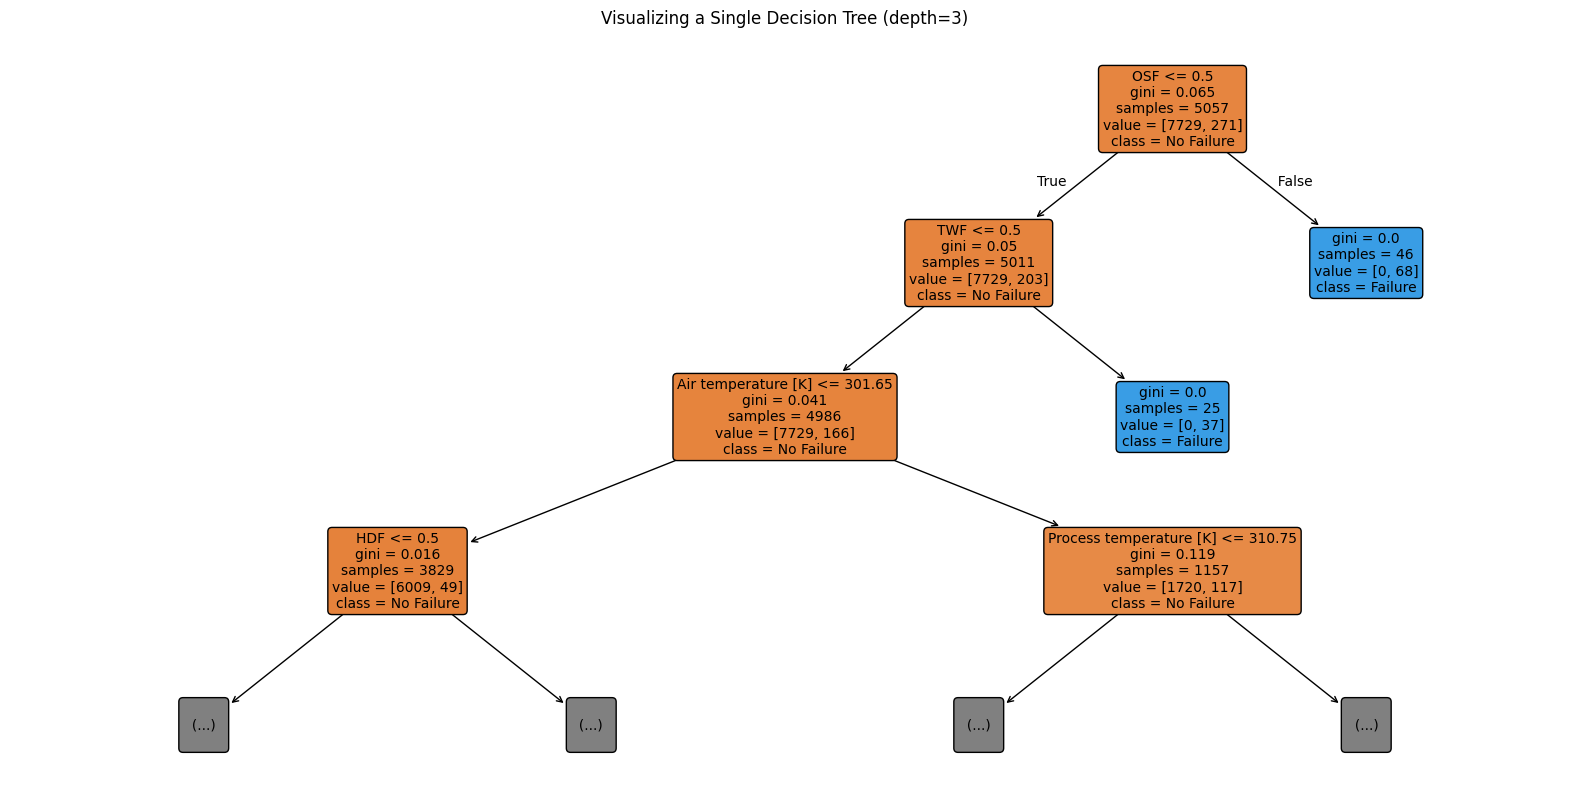

In [6]:
from sklearn.tree import plot_tree

# Plot one tree from the forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0],
          feature_names=X_train.columns,
          class_names=["No Failure", "Failure"],
          filled=True,
          rounded=True,
          max_depth=3,  # control depth for readability
          fontsize=10)
plt.title("Visualizing a Single Decision Tree (depth=3)")
plt.show()


In [7]:
import csv

# Select key metrics from the report
metrics = {
    "Model": "Random Forest",
    "Accuracy": report["accuracy"],
    "Precision": report["1"]["precision"],
    "Recall": report["1"]["recall"],
    "F1-score": report["1"]["f1-score"],
    "Training Time (s)": training_time
}

# Define file path
output_path = "./data/rf_metrics.csv"

# Save as a single-row CSV
with open(output_path, mode="w", newline="") as file:
    writer = csv.DictWriter(file, fieldnames=metrics.keys())
    writer.writeheader()
    writer.writerow(metrics)

print(f"Metrics saved to {output_path}")


Metrics saved to ./data/rf_metrics.csv
